In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("ds_salaries.csv")

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df=df.drop('Unnamed: 0',axis=1)
df['count']=1

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,count
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,1
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,1


In [7]:
df['experience_level'].replace({'EN':'Entry-Level','MI':'Mid-Level','EX':'Executive Level','SE':'Senior'},inplace=True)
df['employment_type'].replace({'PT':'Part-Time','FT':'Full-Time','CT':'Contract','FL':'Freelance'},inplace=True)

In [8]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,count
0,2020,Mid-Level,Full-Time,Data Scientist,70000,EUR,79833,DE,0,DE,L,1
1,2020,Senior,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1
2,2020,Senior,Full-Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1
3,2020,Mid-Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,0,HN,S,1
4,2020,Senior,Full-Time,Machine Learning Engineer,150000,USD,150000,US,50,US,L,1


In [9]:
#checking null values

df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
count                 0
dtype: int64

In [10]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio,count
count,607.000000,6.070000e+02,607.000000,607.00000,607.0
mean,2021.405272,3.240001e+05,112297.869852,70.92257,1.0
std,0.692133,1.544357e+06,70957.259411,40.70913,0.0
min,2020.000000,4.000000e+03,2859.000000,0.00000,1.0
25%,2021.000000,7.000000e+04,62726.000000,50.00000,1.0
50%,2022.000000,1.150000e+05,101570.000000,100.00000,1.0
75%,2022.000000,1.650000e+05,150000.000000,100.00000,1.0
max,2022.000000,3.040000e+07,600000.000000,100.00000,1.0


In [11]:
df.corr()

,work_year,salary,salary_in_usd,remote_ratio,count
work_year,1.000000,-0.087577,0.170493,0.076314,NaN
salary,-0.087577,1.000000,-0.083906,-0.014608,NaN
salary_in_usd,0.170493,-0.083906,1.000000,0.132122,NaN
remote_ratio,0.076314,-0.014608,0.132122,1.000000,NaN
count,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

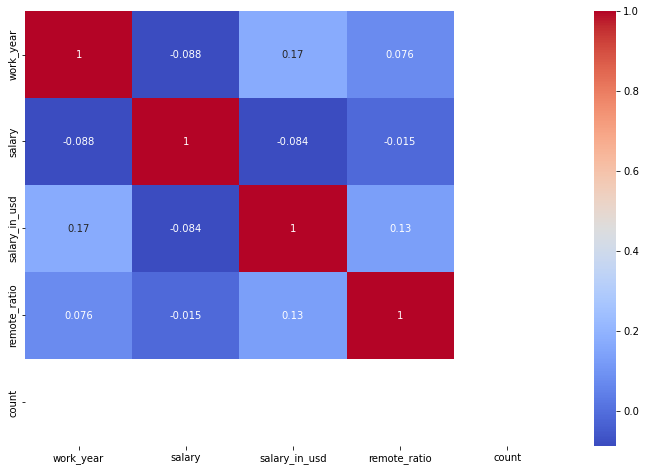

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Text(0.5, 1.0, 'TOP 10 Popular Roles in Data Science')

<Figure size 864x576 with 0 Axes>

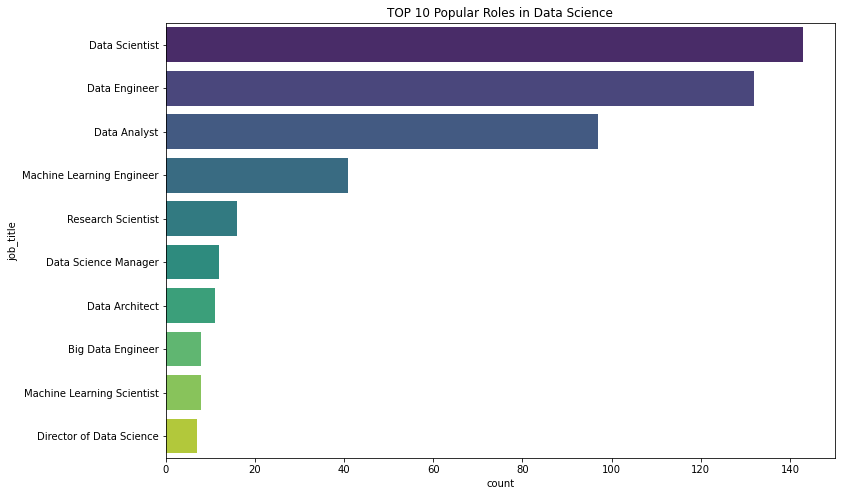

In [13]:
plt.figure(figsize=(12,8))
z=df.groupby('job_title',as_index=False)['count'].count().sort_values(by='count',ascending=False).head(10)
z
plt.figure(figsize=(12,8))
sns.barplot(y='job_title',x='count',data=z,palette="viridis")
plt.title("TOP 10 Popular Roles in Data Science")
#df['job_title'].value_counts().head(10).plot(kind='barh',lw=4,ec="black",hatch="/",title="TOP 10 ROLES")


In [14]:
z=df.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10)
z

,job_title,salary_in_usd
45,Principal Data Engineer,600000
28,Financial Data Analyst,450000
48,Research Scientist,450000
4,Applied Machine Learning Scientist,423000
46,Principal Data Scientist,416000
22,Data Scientist,412000
14,Data Analytics Lead,405000
3,Applied Data Scientist,380000
25,Director of Data Science,325000
17,Data Engineer,324000


Text(0.5, 1.0, 'TOP 10 Highest Paid Roles in Data Science')

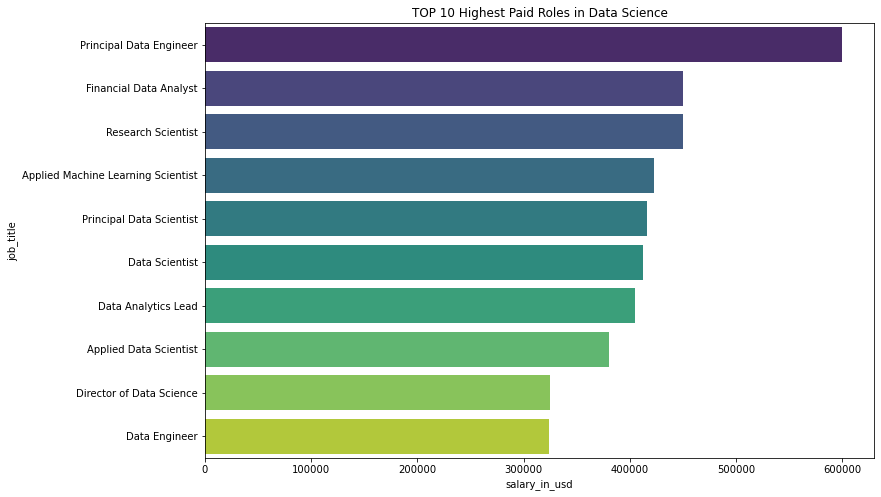

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(y='job_title',x='salary_in_usd',data=z,palette="viridis")
plt.title("TOP 10 Highest Paid Roles in Data Science")

In [16]:
#top 10 roles based on highest average pay 

In [17]:
z=df.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False).head(10)

Text(0.5, 1.0, 'TOP 10 Roles in Data Science Based on Average Pay')

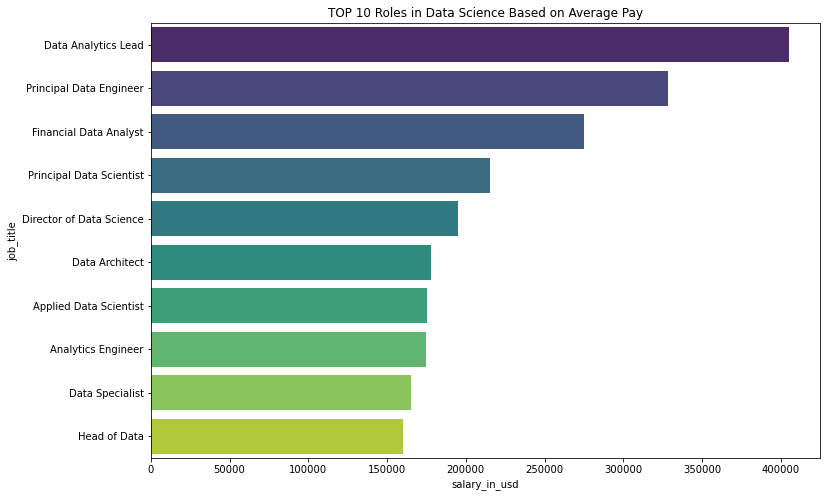

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(y='job_title',x='salary_in_usd',data=z,palette="viridis")
plt.title("TOP 10 Roles in Data Science Based on Average Pay")

In [19]:
z=df.groupby('experience_level',as_index=False)['count'].count().sort_values(by='count',ascending=False)
z

,experience_level,count
3,Senior,280
2,Mid-Level,213
0,Entry-Level,88
1,Executive Level,26


Text(0.5, 1.0, 'JOB PERCENTAGE BASED ON EXPERIENCE LEVEL')

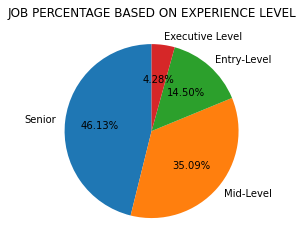

In [20]:
plt.pie(x='count',labels="experience_level",data=z,autopct="%1.2f%%",startangle=90)
plt.title("JOB PERCENTAGE BASED ON EXPERIENCE LEVEL")

In [21]:
z=df.groupby('employment_type',as_index=False)['count'].count().sort_values(by='count',ascending=False).head(10)
z

,employment_type,count
2,Full-Time,588
3,Part-Time,10
0,Contract,5
1,Freelance,4


In [22]:
#plt.figure(figsize=(10,5))
#plt.pie(x='count',data=z,radius=1.3,autopct="%1.2f%%",startangle=90,rotatelabels=True)
#plt.title("JOB PERCENTAGE BASED ON EMPLOYEMENT TYPE")

In [23]:
#Remote Ratio
z=df.groupby('remote_ratio',as_index=False)['count'].count().sort_values(by='count',ascending=False).head(10)
z

,remote_ratio,count
2,100,381
0,0,127
1,50,99


Text(0.5, 1.0, 'REMOTE RATIO')

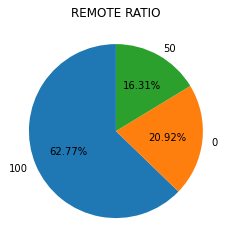

In [24]:
plt.pie(x='count',data=z,labels="remote_ratio",autopct="%1.2f%%",startangle=90)
plt.title("REMOTE RATIO")

In [25]:
z=df.groupby('company_size',as_index=False)['count'].count().sort_values(by='count',ascending=False).head(10)
z

,company_size,count
1,M,326
0,L,198
2,S,83


Text(0.5, 1.0, 'COMPANY SIZE IN DATA SCIENCE FIELD')

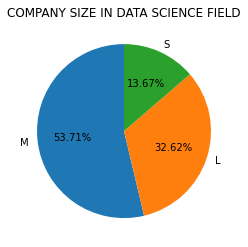

In [26]:
plt.pie(x="count",data=z,labels="company_size",autopct="%1.2f%%",startangle=90)
plt.title("COMPANY SIZE IN DATA SCIENCE FIELD")

In [27]:
z=df.groupby('company_location',as_index=False)['count'].count().sort_values(by='count',ascending=False).head(15)
z


,company_location,count
48,US,355
18,GB,47
6,CA,30
12,DE,28
25,IN,24
17,FR,15
16,ES,14
19,GR,11
29,JP,6
40,PL,4


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary_in_usd'>

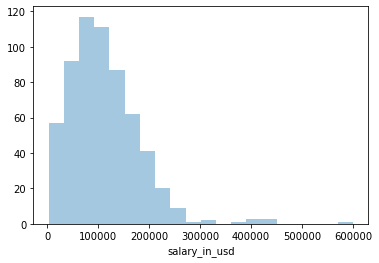

In [28]:
sns.distplot(df['salary_in_usd'],kde=False,bins=20)

Text(0.5, 1.0, 'DATA SCIENCE SALARIES BY YEAR')

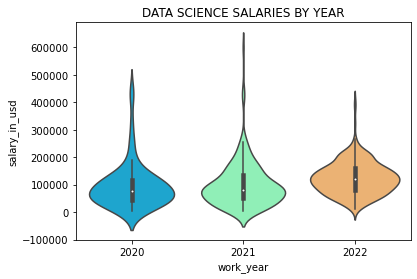

In [29]:
sns.violinplot(x="work_year", y="salary_in_usd", data=df,palette='rainbow')
plt.title("DATA SCIENCE SALARIES BY YEAR")

Text(0.5, 1.0, 'Data Science Salaries by Experience')

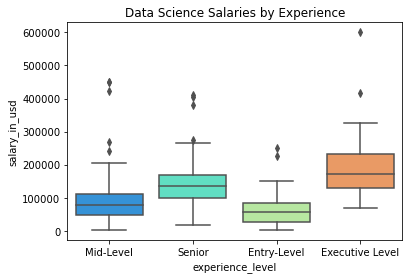

In [30]:
sns.boxplot(x="experience_level", y="salary_in_usd", data=df,palette='rainbow')
plt.title("Data Science Salaries by Experience")

Text(0.5, 1.0, 'Data Science Salaries by employment type')

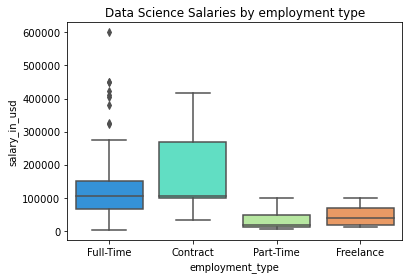

In [31]:
sns.boxplot(x="employment_type", y="salary_in_usd", data=df,palette='rainbow')
plt.title("Data Science Salaries by employment type")

Text(0.5, 1.0, 'Data Science Salaries by company size')

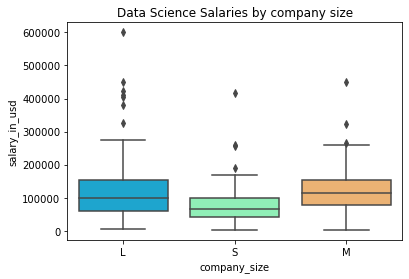

In [32]:
sns.boxplot(x="company_size", y="salary_in_usd", data=df,palette='rainbow')
plt.title("Data Science Salaries by company size")